<a href="https://colab.research.google.com/github/nabeelnazeer/MachineLearningAndParallel_Lab/blob/main/MazeProblemRL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt

class MazeEnv(gym.Env):
    def __init__(self, maze):
        super(MazeEnv, self).__init__()

        self.maze = np.array(maze)
        self.start_pos = np.argwhere(self.maze == 2)[0]  # Start position
        self.goal_pos = np.argwhere(self.maze == 3)[0]   # Goal position
        self.state = tuple(self.start_pos)

        self.action_space = spaces.Discrete(4)  # 4 actions: Up, Down, Left, Right
        self.observation_space = spaces.Tuple((spaces.Discrete(self.maze.shape[0]), spaces.Discrete(self.maze.shape[1])))

    def reset(self):
        self.state = tuple(self.start_pos)
        return self.state

    def step(self, action):
        x, y = self.state
        moves = {0: (-1, 0), 1: (1, 0), 2: (0, -1), 3: (0, 1)}  # U, D, L, R

        new_x, new_y = x + moves[action][0], y + moves[action][1]
        if 0 <= new_x < self.maze.shape[0] and 0 <= new_y < self.maze.shape[1] and self.maze[new_x, new_y] != 1:
            self.state = (new_x, new_y)

        reward = 1 if self.state == tuple(self.goal_pos) else -0.1  # Reward for goal, small penalty otherwise
        done = self.state == tuple(self.goal_pos)
        return self.state, reward, done, {}

    def render(self):
        maze_copy = self.maze.copy()
        x, y = self.state
        maze_copy[x, y] = 5  # Mark agent position
        plt.imshow(maze_copy, cmap="gray")
        plt.show()


In [3]:
import random

class QLearningAgent:
    def __init__(self, state_size, action_size, alpha=0.1, gamma=0.9, epsilon=1.0, epsilon_decay=0.995):
        self.q_table = np.zeros(state_size + (action_size,))
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.action_size = action_size

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.randint(0, self.action_size - 1)  # Explore
        return np.argmax(self.q_table[state])  # Exploit

    def update_q_table(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + self.gamma * self.q_table[next_state][best_next_action]
        self.q_table[state][action] += self.alpha * (td_target - self.q_table[state][action])

    def decay_epsilon(self):
        self.epsilon *= self.epsilon_decay


In [5]:
# Define a simple maze
maze = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [2, 0, 0, 1, 3],  # 2: Start, 3: Goal
]

env = MazeEnv(maze)
agent = QLearningAgent(state_size=(env.maze.shape[0], env.maze.shape[1]), action_size=4)

# Training loop
episodes = 1000
for episode in range(episodes):
    state = env.reset()
    done = False
    while not done:
        action = agent.choose_action(state)
        next_state, reward, done, _ = env.step(action)
        agent.update_q_table(state, action, reward, next_state)
        state = next_state
    agent.decay_epsilon()

print("Training complete!")


Training complete!


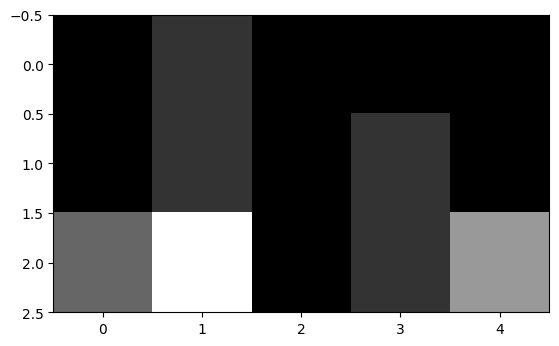

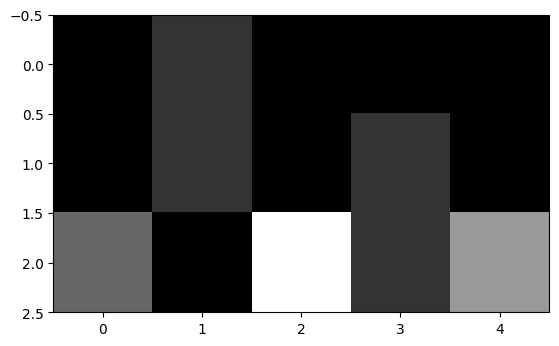

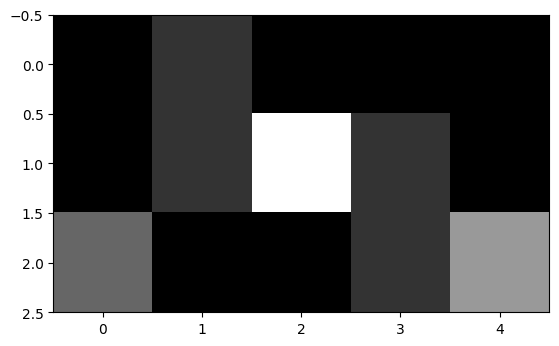

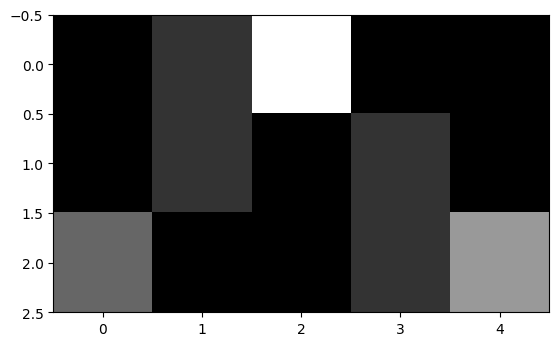

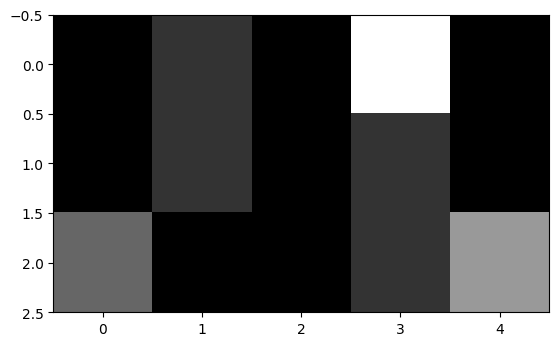

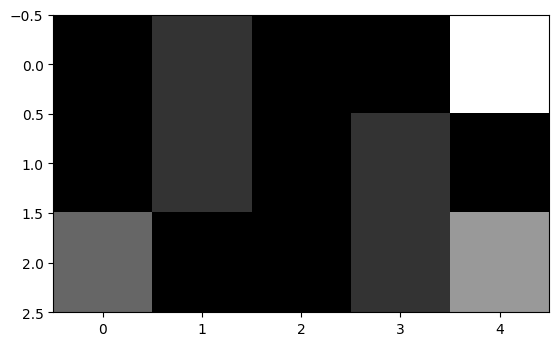

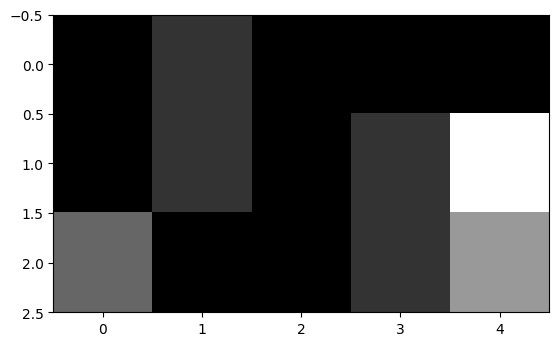

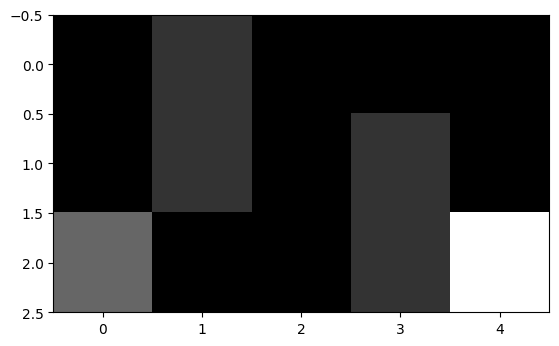

In [7]:
state = env.reset()
done = False
while not done:
    action = np.argmax(agent.q_table[state])
    state, _, done, _ = env.step(action)
    env.render()
